<a href="https://colab.research.google.com/github/AdityaDas-IITM/SummerSchool-CV-Implementation-2021/blob/TransferLearning/Assignment/Session_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 1

1.   PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. Use the `torchvision.datasets` to import preloaded Dataset [`CIFAR`](https://pytorch.org/vision/stable/datasets.html#cifar) to train and then finetune the ResNet18 model.

In [ ]:
#Loading in Resnet18 pre-trained Model

''' Enter your code here''' 

#You can use ```dir(models)``` to see various models available for Transfer Learning

In [ ]:
#Freeze the model weights
'''Enter your code here'''

In [ ]:
#Add the fully connected layer
#Here replace num_classes with number of classes you are classifying 

#Check model summary once to ensure the changes you made

In [ ]:
#Define your transformations to be applied on the images here
from torchvision import transforms
train_transforms = transforms.Compose(
    

'''your code here'''



)

val_transforms = transforms.Compose(
    

'''your code here'''


)

In [ ]:
#Import the CIFAR apply the transformations you created above
#You can access the link given in question statement to check syntax for importing fakedata dataset

'''your code here'''

#Remember to split the dataset into train_dataset and val_dataset

In [ ]:
#Create DataLoaders for you train and val Datasets
'''your code here'''

In [ ]:
'''Define your train function here
you may exclude the timer and scheduler'''

In [ ]:
'''define the criterion,optimizer and scheduler(if used) parameters here'''

In [ ]:
'''run the model''' 

In [ ]:
'''Unfreeze all the layers and finetune the model to increase accuracy as model gets updated for relevancy towards the dataset'''

#TASK 2

In [ ]:
import random
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
# Load the datasets
# reading CSV file
data_iou = read_csv("iou_testcases.csv")
data_iou

,Test_case_number,Box_1,Box_2
0,Test_case_1,"[199, 422, 477, 474]","[31, 419, 204, 436]"
1,Test_case_2,"[345, 367, 449, 502]","[335, 333, 374, 452]"
2,Test_case_3,"[350, 147, 492, 20]","[462, 157, 478, 357]"
3,Test_case_4,"[215, 251, 446, 425]","[126, 463, 360, 510]"


In [ ]:
# Load the datasets
# reading CSV file
data_nms = read_csv("nms_testcases.csv")
data_nms

,Test_case_number,Box_1,Box_2,Box_3,Box_4
0,Test_case_1,"[200, 100, 300, 300, 0.95]","[220, 110, 320, 310, 0.85]","[180, 90, 280, 290, 0.85]","[210, 120, 310, 320, 0.65]"
1,Test_case_2,"[200, 100, 400, 200, 0.65]","[220, 110, 420, 210, 0.85]","[180, 90, 380, 190, 0.5]","[210, 120, 410, 220, 0.6]"
2,Test_case_3,"[100, 150, 330, 290, 0.68]","[90, 175, 320, 310, 0.9]","[350, 90, 450, 290, 0.85]","[340, 110, 440, 310, 0.75]"
3,Test_case_4,"[100, 100, 200, 300, 0.95]","[150, 110, 250, 310, 0.85]","[200, 90, 300, 290, 0.85]","[250, 120, 350, 320, 0.63]"


In [ ]:
# Convert the pandas dataframe into lists
listOfdata = data_iou.to_numpy().tolist()

#Create list of bounding box coordinates for each of the test cases:
iou_test_case_1 = [ast.literal_eval(listOfdata[0][1]), ast.literal_eval(listOfdata[0][2])]
iou_test_case_2 = [ast.literal_eval(listOfdata[1][1]), ast.literal_eval(listOfdata[1][2])]
iou_test_case_3 = [ast.literal_eval(listOfdata[2][1]), ast.literal_eval(listOfdata[2][2])]
iou_test_case_4 = [ast.literal_eval(listOfdata[0][1]), ast.literal_eval(listOfdata[3][2])]

In [ ]:
# Convert the pandas dataframe into lists
listOfDFRows = data_nms.to_numpy().tolist()

#Create list of bounding box coordinates for each of the test cases:
nms_test_case_1 = [ast.literal_eval(listOfDFRows[0][1]), ast.literal_eval(listOfDFRows[0][2]), ast.literal_eval(listOfDFRows[0][3]), ast.literal_eval(listOfDFRows[0][4])]
nms_test_case_2 = [ast.literal_eval(listOfDFRows[1][1]), ast.literal_eval(listOfDFRows[1][2]), ast.literal_eval(listOfDFRows[1][3]), ast.literal_eval(listOfDFRows[1][4])]
nms_test_case_3 = [ast.literal_eval(listOfDFRows[2][1]), ast.literal_eval(listOfDFRows[2][2]), ast.literal_eval(listOfDFRows[2][3]), ast.literal_eval(listOfDFRows[2][4])]
nms_test_case_4 = [ast.literal_eval(listOfDFRows[0][1]), ast.literal_eval(listOfDFRows[3][2]), ast.literal_eval(listOfDFRows[3][3]), ast.literal_eval(listOfDFRows[3][4])]

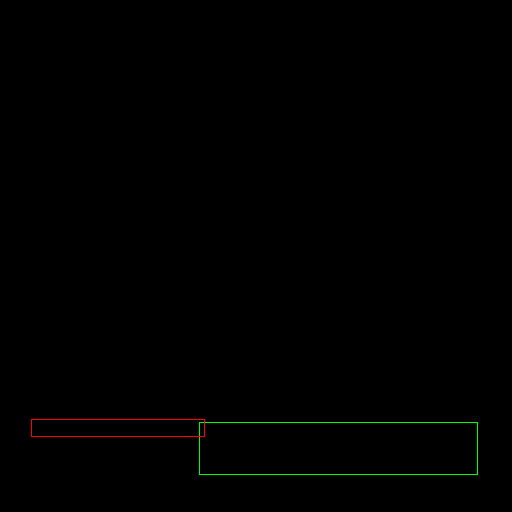

In [ ]:
# Visualize the boxes for one of the test cases
img = np.zeros([512,512,3] ,dtype = np.uint8)
box1, box2= iou_test_case_1[0], iou_test_case_1[1]
img2 = cv2.rectangle(img, (box1[0], box1[1]), (box1[2], box1[3]) , color = (0,255,0))#green
img2 = cv2.rectangle(img, (box2[0], box2[1]), (box2[2], box2[3]) , color = (0,0,255))#red

cv2_imshow(img2)

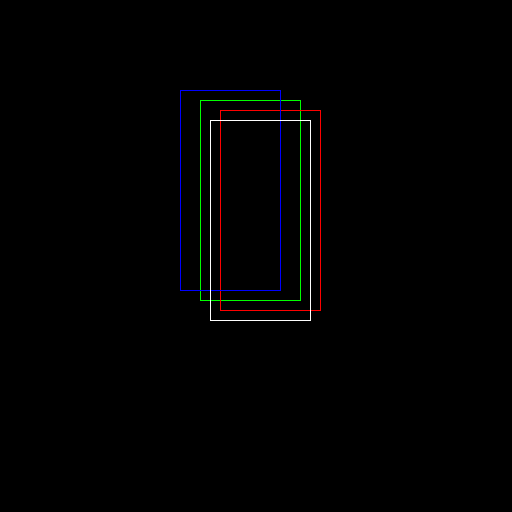

In [ ]:
# Visualize the boxes for one of the test cases
img = np.zeros([512,512,3] ,dtype = np.uint8)
box1, box2, box3, box4 = nms_test_case_1[0], nms_test_case_1[1], nms_test_case_1[2], nms_test_case_1[3]
img2 = cv2.rectangle(img, (box1[0], box1[1]), (box1[2], box1[3]) , color = (0,255,0))
img2 = cv2.rectangle(img, (box2[0], box2[1]), (box2[2], box2[3]) , color = (0,0,255))
img2 = cv2.rectangle(img, (box3[0], box3[1]), (box3[2], box3[3]) , color = (255,0,0))
img2 = cv2.rectangle(img, (box4[0], box4[1]), (box4[2], box4[3]) , color = (255,255,255)) 
cv2_imshow(img2)

In [ ]:
'''
Exercise: Implement iou(). Some hints:
    In this exercise only, we define a box using its two corners (upper left and
     lower right): (x1, y1, x2, y2) rather than the midpoint and height/width.
    To calculate the area of a rectangle you need to multiply its height 
    (y2 - y1) by its width (x2 - x1)
    You'll also need to find the coordinates (xi1, yi1, xi2, yi2) of the 
    intersection of two boxes. 
'''
def iou(box1, box2):
    """Implement the intersection over union (IoU) between box1 and box2
    Arguments:
    box1 -- first box, list object with coordinates (x1, y1, x2, y2)
    box2 -- second box, list object with coordinates (x1, y1, x2, y2)
    """
################################################################################
# TODO: Replace "None" with the correct code/ logic to find IoU for the boxes. #
# Remember to account for the case in which IoU is 0.                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    # Calculate the (y1, x1, y2, x2) coordinates of the intersection of box1   #
    # and box2. Calculate its Area.                                            #
    xi1 = None
    yi1 = None
    xi2 = None
    yi2 = None
    # Case in which they don't intersec --> max(,0)
    inter_area = None

    # Calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
    box1_area = None
    box2_area = None
    union_area = None

    # compute the IoU
    iou = None
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    return iou

In [ ]:
################################################################################
# TODO: Replace "None" with the correct code/ logic to find IoU for the boxes. #
# Perform iou on the test cases                                                #
################################################################################
iou_result_1 = None
iou_result_2 = None
iou_result_3 = None
iou_result_4 = None
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [ ]:
# Print out the test cases:
print("IoU for 1st test case is: ", iou_result_1, 
      "IoU for 2nd test case is: ", iou_result_2, 
      "IoU for 3rd test case is: ", iou_result_3, 
      "IoU for 4th test case is: ", iou_result_4)

In [ ]:
'''
Exercise: Implement nms(). Some hints:
    In this functoin, we will be performing non max suppression to select 
    bounding boxes for an object.
    We will be assuming there is only one class of objects. However, the code is
    is not very different for multiple classes of objects. 
    
    c_score represents the confidence score of particular bounding box.

    Use the iou function defined earlier.

    Remember the algorithm to perform nms:
    Discard all bounding boxes with confidence score < c_score_threshold
    While there are any remaining boxes:
      Pick box with largest confidence, output that as prediction.
      Discard any remaining boxes with IoU > iou_threshold with the output box. 

    0.6 is an arbitrary number- feel free to experiment with it.

    Make use of list comprehenion
'''
def nms(bboxes,iou_threshold,c_score_threshold):
  '''
    Implement non max supression given a list of bounding boxes.
    Arguments:
    bboxes: list of lists- the inner lists contain 5 elements and are of the
            following format: [x1, y1, x2, y2, c_score]
    iou_threshold: The threshold above which bounding boxes with lower confidence
                    score are removed.
    c_score_threshold: The minimum value of c_score below which bounding boxes
                       are removed.
    ''' 
################################################################################
# TODO: Replace "None" with the correct code/ logic to find IoU for the boxes. #
# Remember to account for the case in which IoU is 0.                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  #Using list comprehension (or otherwise), select bounding boxes which have
  # confidence score greater than c_score_threshold.
  bboxes = None

  #Sort the bounding boxes in decresing order of confidence score.
  bboxes = None

  #An empty list to store selected bounding boxes.
  boxes_after_nms = []

  #Loop through the bounding boxes
  while bboxes:
      #Select box with highest confidence score
      chosen_box = None
      #Using list comprehension (or otherwise), eliminate bounding boxes whose
      #iou with "chosen_box" is greater than threshold.
      bboxes = None
      #Add the bbox with highest confidence score to the formerly created list.
      boxes_after_nms.append(chosen_box)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
  return boxes_after_nms

In [ ]:
################################################################################
# TODO: Replace "None" with the correct code/ logic to find nms for the boxes. #
# Perform nms on the test cases 
# Experiment with values for iou threshold and c_score threshold               #
################################################################################
nms_result_1 = None
nms_result_2 = None
nms_result_3 = None
nms_result_4 = None
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [ ]:
# Check the number of bounding boxes returned for eaach test case.
print("Number of bounding boxes returned for 1st test case is: ", len(nms_result_1), 
      "Number of bounding boxes returned for 2nd test case is: ", len(nms_result_2),
      "Number of bounding boxes returned for 3rd test case is: ", len(nms_result_3),
      "Number of bounding boxes returned for 4th test case is: ", len(nms_result_4))

In [ ]:
# Depending on the number of bounding boxes, visualize the results. 
img = np.zeros([512,512,3] ,dtype = np.uint8)

box1 = None
img2 = cv2.rectangle(img, (box1[0], box1[1]), (box1[2], box1[3]) , color = (0,255,0))

cv2_imshow(img2)